# Лабораторная работа 4 - Регрессия

### Цель работы: Изучение методов регриссионного анализа данных¶

## Задачи:
    1) Подгововить данные
    
    2) Изучить работу разных алгоритмов регрессии
    
    3) Сделать выводы об иследованых алгоритмах
    
# Задание на лабораторную работу
    
   1. Загрузить и провести предварительную обработку данные из заданного вашим вариантом датасета (при необходимости примените метод скользящего окна для подготовки данных https://nauka-rastudent.ru/38/4062/)
    
   2. Выберите иследуемый признак (то что будете предсказывать. Выбирать надо числовой признак, а не класс) 3) Обучите каждый из предложеных ниже алгоритмов. Для каждого алгоритма вы должны получить следующие параметры:
    
        * Точность обучения
        * Время затраченное на обучение
        * Постройте график или таблицу показывающую исходный признак и его предсказание
   
   3. На основе данных полученых выше сделайте вывод о работе алгоритмов. Выберите лучший для ваших данных Список алгоритмов:

         * Линейная регрессия
         * SVR
         * RandomForest (регрессия)
         * KNeighbors (регрессия)
         * AdaBoost (регрессия)
         * Регрессия на основе нейронной сети (sklearn MLP)
         * Регрессия на основе нейронной сети (Keras + tensorflow(без GPU))
    

Загрузим данные и посмотрим на их структуру. В данных есть не числовые значения, это нужно исправить, чтобы не было ошибок в вычислениях

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing

df = pd.read_csv('C:\\responses.csv')
pd.options.display.max_columns = 200
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

Переводим все значения в числовые 

In [2]:
import sklearn.preprocessing as preprocessing

number_data = pd.get_dummies(df)
number_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Smoking_current smoker,Smoking_former smoker,Smoking_never smoked,Smoking_tried smoking,Alcohol_drink a lot,Alcohol_never,Alcohol_social drinker,Punctuality_i am always on time,Punctuality_i am often early,Punctuality_i am often running late,Lying_everytime it suits me,Lying_never,Lying_only to avoid hurting someone,Lying_sometimes,Internet usage_few hours a day,Internet usage_less than an hour a day,Internet usage_most of the day,Internet usage_no time at all,Gender_female,Gender_male,Left - right handed_left handed,Left - right handed_right handed,Education_college/bachelor degree,Education_currently a primary school pupil,Education_doctorate degree,Education_masters degree,Education_primary school,Education_secondary school,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1

In [4]:
number_data = number_data.apply(pd.to_numeric)
number_data = number_data.fillna(method='pad')
number_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 173 entries, Music to House - block of flats_house/bungalow
dtypes: float64(134), int64(5), uint8(34)
memory usage: 1.1 MB


Далее в связи с ошибкой которая появилась ниже нужно преобразовать все данные в таблице.

И еще добавим конвеер с удалением выбросов из данных взятый из предыдущих работ

In [5]:
import sklearn.pipeline as pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class DropOutlet(BaseEstimator):
    """
    Удаление выбросов, основываясь на правиле 3-х сигм (только для нормального распределения)
    """
        
    def fit(self, X: pd.DataFrame, y=None):
        """
        Получаем стандартное отклонение для каждого столбца и сохраняем их        
        """
        number_data.select_dtypes(include=['float', 'int'])
        self.std = X.std()
        self.columns = self.std.index.values
        return self
    
    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        """
        Убираем все здачения, котоые находятся дальше 3-х стандартных отконений (сигма) от мат. ожидания случайной величины
        """
        X_cols = X[self.columns]
        return X[ (X_cols - X_cols.mean()).abs() <= 3*self.std ].dropna()

Уберем выбросы и нормализуем данные 

In [6]:
import sklearn.preprocessing as preprocessing

pipe_outlet = pipeline.Pipeline([
    ('drop_outlet', DropOutlet()),
])
number_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 173 entries, Music to House - block of flats_house/bungalow
dtypes: float64(134), int64(5), uint8(34)
memory usage: 1.1 MB


In [7]:
df_scalar = preprocessing.MinMaxScaler().fit(number_data)
norm_df = pd.DataFrame(columns=number_data.columns, data=df_scalar.transform(number_data))
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 173 entries, Music to House - block of flats_house/bungalow
dtypes: float64(173)
memory usage: 1.3 MB


Разделим данные на тренировочные и тестовые в выборку 8 к 2, где 80% - тренировочные, 20% - тестовые соотвественно

In [8]:
XY_data = norm_df.sample(frac=1)
point_split = round(XY_data.shape[0] * 0.8)
train_data = XY_data.reset_index(drop=True)[:point_split]
test_data = XY_data[point_split:]
test_index = test_data.index
test_data = test_data.reset_index(drop=True)
print(f'Всего данных: {XY_data.shape[0]}')
print(f'Тренировочных данных: {train_data.shape[0]}')
print(f'Тестовых данных: {test_data.shape[0]}')

Всего данных: 1010
Тренировочных данных: 808
Тестовых данных: 202


Посмотрим количество данных

In [9]:
TARGET_COLS = ['Gender_female', 'Gender_male']
X_train = train_data.drop(TARGET_COLS, axis=1)
Y_train = train_data[TARGET_COLS]
print(f'Размер данные для тренировки (входных): {X_train.shape}')
print(f'Размер данные для тренировки (выходных): {Y_train.shape}')

# Тестовые
X_test = test_data.drop(TARGET_COLS, axis=1)
Y_test = test_data[TARGET_COLS]
print(f'Размер данные для теста (входных): {X_test.shape}')
print(f'Размер данные для теста (выходных): {Y_test.shape}')


Размер данные для тренировки (входных): (808, 171)
Размер данные для тренировки (выходных): (808, 2)
Размер данные для теста (входных): (202, 171)
Размер данные для теста (выходных): (202, 2)


In [10]:
from contextlib import contextmanager
from time import time

@contextmanager
def measure_time():
  t = time()
  yield
  print(f'Потрачено времени {time() - t} сек')

# Опорная векторная регрессия

    Цель алгоритма опорных векторов состоит в том, чтобы найти гиперплоскость в N-мерном пространстве (N - число признаков), которая четко классифицирует точки данных.

In [11]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 173 entries, Music to House - block of flats_house/bungalow
dtypes: float64(173)
memory usage: 1.3 MB


In [12]:
from sklearn.svm import SVR

svm = SVR()

X = X_train.values
Y = Y_train['Gender_female'].values
with measure_time():
    svm.fit(X, Y)

print('Точность для тренировочных')
print(svm.score(X, Y))

print('Точность для тестовых')
print(svm.score(X_test.values, Y_test['Gender_female'].values))

print('Мат. ожидание Y')
print(Y.mean())
print('Дисперсия Y')
print(Y.std())

Потрачено времени 0.12152981758117676 сек
Точность для тренировочных
0.952618203078121
Точность для тестовых
0.6834649406750936
Мат. ожидание Y
0.5792079207920792
Дисперсия Y
0.4936862417404354


In [13]:
svm2 = SVR()

X = X_train.values
Y = Y_train['Gender_male'].values
with measure_time():
    svm2.fit(X, Y)

print('Точность для тренировочных')
print(svm2.score(X, Y))

print('Точность для тестовых')
print(svm2.score(X_test.values, Y_test['Gender_male'].values))

print('Мат. ожидание Y')
print(Y.mean())
print('Дисперсия Y')
print(Y.std())

Потрачено времени 0.12865161895751953 сек
Точность для тренировочных
0.9551647601241825
Точность для тестовых
0.6780910803623369
Мат. ожидание Y
0.4146039603960396
Дисперсия Y
0.49265354603408545


Из - за малого количества данных времени было затрачено мало. Однако точность вполне хорошая, если брать в расчет отклонение данных, то при низком отклонении даже слабо обученный ИИ будет достаточно неплохо угадывать данные, но если отклонение будет высоким, то и соответственно будут проблемы с "предугадыванием".Таким образом "предугадывание" имеет шансы попасть в точные значения.

# Линейная регрессия

Линейная регрессия вычисляет оценочные функции коэффициентов регрессии или просто прогнозируемые весы измерения, обозначаемые как b₀, b₁, …, bᵣ. Они определяют оценочную функцию регрессии f(x) = b₀ + b₁x₁ + ⋯ + bᵣxᵣ. Эта функция захватывает зависимости между входами и выходом достаточно хорошо.

In [14]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
X = X_train.values
Y = Y_train['Gender_female'].values

with measure_time():
    LR.fit(X,Y)

print('Точность для тренировочных')
print(LR.score(X, Y))

print('Точность для тестовых')
print(LR.score(X_test.values, Y_test['Gender_female'].values))

print('Мат. ожидание Y')
print(Y.mean())
print('Дисперсия Y')
print(Y.std())

Потрачено времени 0.021958351135253906 сек
Точность для тренировочных
0.7853835261973766
Точность для тестовых
0.6419073424894701
Мат. ожидание Y
0.5792079207920792
Дисперсия Y
0.4936862417404354


In [15]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
X = X_train.values
Y = Y_train['Gender_male'].values

with measure_time():
    LR.fit(X,Y)

print('Точность для тренировочных')
print(LR.score(X, Y))

print('Точность для тестовых')
print(LR.score(X_test.values, Y_test['Gender_male'].values))

print('Мат. ожидание Y')
print(Y.mean())
print('Дисперсия Y')
print(Y.std())

Потрачено времени 0.015956878662109375 сек
Точность для тренировочных
0.7953309727606066
Точность для тестовых
0.635506751927593
Мат. ожидание Y
0.4146039603960396
Дисперсия Y
0.49265354603408545


С моими данными линейная регрессия сработала не очень хорошо

# Случайный лес¶

In [16]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
X = X_train.values
Y = Y_train['Gender_female'].values

with measure_time():
    RF.fit(X,Y)

print('Точность для тренировочных')
print(RF.score(X, Y))

print('Точность для тестовых')
print(RF.score(X_test.values, Y_test['Gender_female'].values))

print('Мат. ожидание Y')
print(Y.mean())
print('Дисперсия Y')
print(Y.std())

Потрачено времени 1.120072603225708 сек
Точность для тренировочных
0.9603317295123177
Точность для тестовых
0.7330305038961038
Мат. ожидание Y
0.5792079207920792
Дисперсия Y
0.4936862417404354


In [17]:
RF = RandomForestRegressor()
X = X_train.values
Y = Y_train['Gender_male'].values

with measure_time():
    RF.fit(X,Y)

print('Точность для тренировочных')
print(RF.score(X, Y))

print('Точность для тестовых')
print(RF.score(X_test.values, Y_test['Gender_male'].values))

print('Мат. ожидание Y')
print(Y.mean())
print('Дисперсия Y')
print(Y.std())

Потрачено времени 1.0954687595367432 сек
Точность для тренировочных
0.9630743668549431
Точность для тестовых
0.7188095029239765
Мат. ожидание Y
0.4146039603960396
Дисперсия Y
0.49265354603408545


Я считаю вполне неплохо

# KNeighbors

Метод k-ближайших соседей — метрический алгоритм для автоматической классификации объектов или регрессии. В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым среди k соседей данного элемента, классы которых уже известны.

In [18]:
from sklearn.neighbors import KNeighborsRegressor
KN = KNeighborsRegressor()
X = X_train.values
Y = Y_train['Gender_female'].values

with measure_time():
    KN.fit(X,Y)

print('Точность для тренировочных')
print(KN.score(X, Y))

print('Точность для тестовых')
print(KN.score(X_test.values, Y_test['Gender_female'].values))

print('Мат. ожидание Y')
print(Y.mean())
print('Дисперсия Y')
print(Y.std())


Потрачено времени 0.02991962432861328 сек
Точность для тренировочных
0.6301236802413273
Точность для тестовых
0.46189298701298687
Мат. ожидание Y
0.5792079207920792
Дисперсия Y
0.4936862417404354


In [19]:
from sklearn.neighbors import KNeighborsRegressor
KN = KNeighborsRegressor()
X = X_train.values
Y = Y_train['Gender_male'].values

with measure_time():
    KN.fit(X,Y)

print('Точность для тренировочных')
print(KN.score(X, Y))

print('Точность для тестовых')
print(KN.score(X_test.values, Y_test['Gender_male'].values))

print('Мат. ожидание Y')
print(Y.mean())
print('Дисперсия Y')
print(Y.std())

Потрачено времени 0.023935317993164062 сек
Точность для тренировочных
0.6328547537155658
Точность для тестовых
0.4717961570593149
Мат. ожидание Y
0.4146039603960396
Дисперсия Y
0.49265354603408545


Определенно метод не подходит

# AdaBoost

AdaBoost вызывает слабый классификатор в цикле. После каждого вызова обновляется распределение весов, которые отвечают важности каждого из объектов обучающего множества для классификации. На каждой итерации веса каждого неверно классифицированного объекта возрастают, таким образом новый классификатор «фокусирует своё внимание» на этих объектах.

In [20]:
from sklearn.ensemble import AdaBoostRegressor
Ada = AdaBoostRegressor()
X = X_train.values
Y = Y_train['Gender_female'].values

with measure_time():
    Ada.fit(X,Y)

print('Точность для тренировочных')
print(Ada.score(X, Y))

print('Точность для тестовых')
print(Ada.score(X_test.values, Y_test['Gender_female'].values))

print('Мат. ожидание Y')
print(Y.mean())
print('Дисперсия Y')
print(Y.std())

Потрачено времени 0.4641077518463135 сек
Точность для тренировочных
0.6979349070834917
Точность для тестовых
0.5785554084776152
Мат. ожидание Y
0.5792079207920792
Дисперсия Y
0.4936862417404354


In [21]:
from sklearn.ensemble import AdaBoostRegressor
Ada = AdaBoostRegressor()
X = X_train.values
Y = Y_train['Gender_male'].values

with measure_time():
    Ada.fit(X,Y)

print('Точность для тренировочных')
print(Ada.score(X, Y))

print('Точность для тестовых')
print(Ada.score(X_test.values, Y_test['Gender_male'].values))

print('Мат. ожидание Y')
print(Y.mean())
print('Дисперсия Y')
print(Y.std())

Потрачено времени 0.43186020851135254 сек
Точность для тренировочных
0.7314621482693905
Точность для тестовых
0.5887456716839703
Мат. ожидание Y
0.4146039603960396
Дисперсия Y
0.49265354603408545


Относитльно неплохо, но все - равно слабо

# MLP - многослойный перцептрон

Многослойный перцептрон — частный случай перцептрона Розенблатта, в котором один алгоритм обратного распространения ошибки обучает все слои.

In [22]:
from sklearn.neural_network import MLPRegressor
X = X_train.values
Y = Y_train['Gender_female'].values
regr = MLPRegressor(max_iter=500)
with measure_time():
    regr.fit(X, Y)

print('Точность для тренировочных')
print(regr.score(X, Y))

print('Точность для тестовых')
print(regr.score(X_test.values, Y_test['Gender_female'].values))

print('Мат. ожидание Y')
print(Y.mean())
print('Дисперсия Y')
print(Y.std())

Потрачено времени 0.8686532974243164 сек
Точность для тренировочных
0.9343509886561856
Точность для тестовых
0.6268086622010829
Мат. ожидание Y
0.5792079207920792
Дисперсия Y
0.4936862417404354


In [23]:
X = X_train.values
Y = Y_train['Gender_male'].values
regr = MLPRegressor(max_iter=500)
with measure_time():
    regr.fit(X, Y)

print('Точность для тренировочных')
print(regr.score(X, Y))

print('Точность для тестовых')
print(regr.score(X_test.values, Y_test['Gender_male'].values))

print('Мат. ожидание Y')
print(Y.mean())
print('Дисперсия Y')
print(Y.std())

Потрачено времени 0.5545182228088379 сек
Точность для тренировочных
0.9035580499369297
Точность для тестовых
0.5311948999136602
Мат. ожидание Y
0.4146039603960396
Дисперсия Y
0.49265354603408545


In [24]:
X_train.shape[1]

171

In [25]:
Y_train.shape[1]

2

# Keras

In [26]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import activations
from keras.optimizers import Adam, RMSprop
from keras.losses import mae, mse
from keras import callbacks
from pathlib import Path
from os import remove

Задаем функцию создания сети, взятую из предыдущей лабы

In [36]:
# создание архитектуры
def make_nn(input_len, output_len):
    model = Sequential()
    model.add(Dense(128, activation=activations.relu, input_dim=input_len)) # input = 171
    model.add(Dense(32, activation=activations.sigmoid))
    model.add(Dense(8, activation=activations.sigmoid))
    model.add(Dense(4, activation=activations.sigmoid))
    model.add(Dense(output_len, activation=activations.sigmoid)) #out = 2
    model.compile(Adam(learning_rate=0.001), mse, metrics=[mae])
    return model

Создадим шаблон для файла контрольной точки. Создаем каталог и удаляем файлы в нем

In [37]:
# создадим функцию создания о очистки каталога контрольных точек
# указываем шаблон имени фала контрольной точки
file_name = 'nn_model_loss-{loss:.5f}_val_loss-{val_loss:.5f}_acc-{mean_absolute_error:.5f}_val_acc-{val_mean_absolute_error:.5f}.hdf5'
def make_save_points(name='save_points', file_name=file_name):
    checkpoints_dir = Path('./').joinpath('save_points')
    print(f'Текущий каталог с контрольными точками {checkpoints_dir.absolute()}')
    # Создаем каталог если его нету
    checkpoints_dir.mkdir(exist_ok=True)
    # Удаляем все из каталога
    for item in checkpoints_dir.iterdir():
        if item.is_file():
            print(f'Удаляем файл {item}')
            remove(item)
    return str(checkpoints_dir.joinpath(file_name))

In [56]:
print('Начинаем обучение сети')
history = make_nn(X_train.shape[1], Y_train.shape[1]).fit(
    x=X_train,
    y=Y_train,
    batch_size=5,
    epochs=600,
    validation_data=(X_test, Y_test),
    verbose=1,
    callbacks=[
        callbacks.History(),
        callbacks.EarlyStopping(
            monitor='val_loss',
            mode='min',
            patience=50,
            min_delta=1e-6
        ),
#         Callback сохранений состояний сети
        callbacks.ModelCheckpoint(
#             Указываем путь для сохранения и формат имен файлов
            make_save_points(file_name=file_name),
#             Указываем какое значение отслеживать
            monitor='val_loss',
#             Указываем, что сохранять надо только лучшие результаты
            save_best_only=True,
#             Говорим как часто проверять, что текущий результат лучше предидущего (в эпохах)
            period=5,
#             Указываем сторону лучших значений
            mode='min'
        )
    ]
)

Начинаем обучение сети
Текущий каталог с контрольными точками C:\Users\Devil\save_points
Удаляем файл save_points\nn_model_loss-0.02534_val_loss-0.07381_acc-0.08721_val_acc-0.13922.hdf5
Удаляем файл save_points\nn_model_loss-0.02887_val_loss-0.06854_acc-0.08264_val_acc-0.12731.hdf5
Удаляем файл save_points\nn_model_loss-0.02936_val_loss-0.07393_acc-0.10967_val_acc-0.15589.hdf5
Удаляем файл save_points\nn_model_loss-0.04657_val_loss-0.08308_acc-0.14701_val_acc-0.18145.hdf5
Удаляем файл save_points\nn_model_loss-0.05964_val_loss-0.08609_acc-0.19887_val_acc-0.21856.hdf5
Удаляем файл save_points\nn_model_loss-0.12873_val_loss-0.12307_acc-0.33555_val_acc-0.31939.hdf5
Epoch 1/600
162/162 [==============================] - 1s 2ms/step - loss: 0.2418 - mean_absolute_error: 0.4812 - val_loss: 0.2016 - val_mean_absolute_error: 0.4409
Epoch 2/600
162/162 [==============================] - 0s 1ms/step - loss: 0.1982 - mean_absolute_error: 0.4347 - val_loss: 0.1574 - val_mean_absolute_error: 0.3802

162/162 [==============================] - 0s 1ms/step - loss: 0.0247 - mean_absolute_error: 0.0580 - val_loss: 0.0723 - val_mean_absolute_error: 0.1096
Epoch 46/600
162/162 [==============================] - 0s 1ms/step - loss: 0.0155 - mean_absolute_error: 0.0481 - val_loss: 0.0715 - val_mean_absolute_error: 0.1088
Epoch 47/600
162/162 [==============================] - 0s 1ms/step - loss: 0.0166 - mean_absolute_error: 0.0485 - val_loss: 0.0752 - val_mean_absolute_error: 0.1135
Epoch 48/600
162/162 [==============================] - 0s 1ms/step - loss: 0.0160 - mean_absolute_error: 0.0482 - val_loss: 0.0753 - val_mean_absolute_error: 0.1123
Epoch 49/600
162/162 [==============================] - 0s 1ms/step - loss: 0.0374 - mean_absolute_error: 0.0734 - val_loss: 0.0732 - val_mean_absolute_error: 0.1081
Epoch 50/600
162/162 [==============================] - 0s 1ms/step - loss: 0.0416 - mean_absolute_error: 0.0818 - val_loss: 0.1223 - val_mean_absolute_error: 0.1646
Epoch 51/600
162/

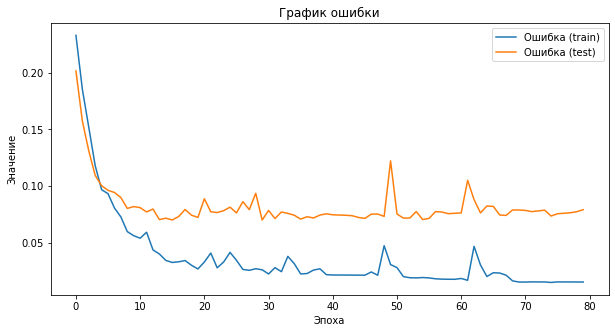

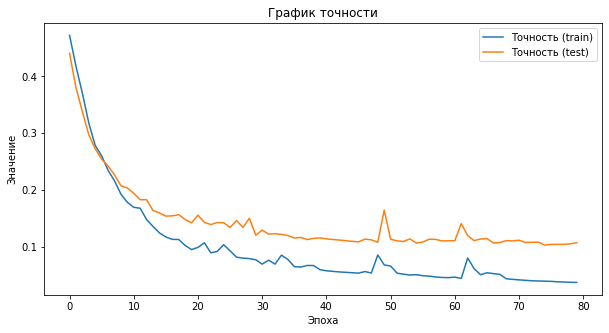

In [57]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)']);

График показывает низкую точность из-за того что это не разделение по классам а предугадывание. Оно никогда не бывает точным на 100% и заключается в оценке примерного значения.

In [59]:
from keras.models import load_model
loaded_model = load_model('./save_points/nn_model_loss-0.02603_val_loss-0.07001_acc-0.07716_val_acc-0.12056.hdf5')

# Прдсказываем класс
print(f'Точность предсказания на тренировочных данных {loaded_model.evaluate(X_train, Y_train)[1]}')
print(f'Точность предсказания на тестовых данных {loaded_model.evaluate(X_test, Y_test)[1]}')
predict = loaded_model.predict(X_test)
predict

26/26 [==============================] - 0s 842us/step - loss: 0.0221 - mean_absolute_error: 0.0701
Точность предсказания на тренировочных данных 0.07008664309978485
7/7 [==============================] - 0s 1ms/step - loss: 0.0700 - mean_absolute_error: 0.1206
Точность предсказания на тестовых данных 0.12055940926074982


array([[0.9368273 , 0.05094948],
       [0.94820106, 0.04122904],
       [0.9496268 , 0.0400224 ],
       [0.94889104, 0.04064494],
       [0.05613205, 0.9489281 ],
       [0.94960725, 0.04003891],
       [0.9494338 , 0.04018563],
       [0.9469264 , 0.04231119],
       [0.05642655, 0.9486425 ],
       [0.05628055, 0.9487842 ],
       [0.9495716 , 0.04006895],
       [0.06279519, 0.9424398 ],
       [0.9493544 , 0.04025269],
       [0.94945747, 0.0401656 ],
       [0.05721602, 0.94787633],
       [0.94962263, 0.04002592],
       [0.94952893, 0.04010513],
       [0.9495616 , 0.04007751],
       [0.05646813, 0.9486021 ],
       [0.05610815, 0.9489513 ],
       [0.94963443, 0.04001594],
       [0.9495336 , 0.04010117],
       [0.94937694, 0.04023379],
       [0.9404255 , 0.04785997],
       [0.9493555 , 0.04025176],
       [0.9496069 , 0.04003912],
       [0.05663428, 0.948441  ],
       [0.9381181 , 0.04984176],
       [0.94963384, 0.04001632],
       [0.9492879 , 0.04030916],
       [0.

Данные представленны в нормализованном виде, их нужно вернуть в обычный вид. Для этого мы находим индекс максимального значения в обоих наборах. Затем создадим исходную строку и заполним ее нулями, а в позициях Gender_male и Gender_female подставим нужные значения. метод используем inverse_transform он переводит значения в первоначальный вид.

In [60]:
Gender_male_pos_src = (Y_train.columns == 'Gender_male').argmax()
Gender_female_pos_src = (Y_train.columns == 'Gender_female').argmax()

Gender_male_pos_dst = (norm_df.columns == 'Gender_male').argmax()
Gender_female_pos_dst = (norm_df.columns == 'Gender_female').argmax()


inv_data = np.zeros((predict.shape[0], norm_df.shape[1],))

inv_data[:, Gender_male_pos_dst] = predict[:, Gender_male_pos_src]
inv_data[:, Gender_female_pos_dst] = predict[:, Gender_female_pos_src]

print(inv_data)

inv_data = df_scalar.inverse_transform(inv_data)[:, [Gender_male_pos_dst, Gender_female_pos_dst]]

inv_data

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([[0.05094948, 0.9368273 ],
       [0.04122904, 0.94820106],
       [0.0400224 , 0.9496268 ],
       [0.04064494, 0.94889104],
       [0.94892812, 0.05613205],
       [0.04003891, 0.94960725],
       [0.04018563, 0.9494338 ],
       [0.04231119, 0.94692641],
       [0.94864249, 0.05642655],
       [0.94878417, 0.05628055],
       [0.04006895, 0.94957161],
       [0.94243979, 0.06279519],
       [0.04025269, 0.94935441],
       [0.0401656 , 0.94945747],
       [0.94787633, 0.05721602],
       [0.04002592, 0.94962263],
       [0.04010513, 0.94952893],
       [0.04007751, 0.9495616 ],
       [0.94860208, 0.05646813],
       [0.9489513 , 0.05610815],
       [0.04001594, 0.94963443],
       [0.04010117, 0.94953358],
       [0.04023379, 0.94937694],
       [0.04785997, 0.94042552],
       [0.04025176, 0.94935548],
       [0.04003912, 0.9496069 ],
       [0.94844103, 0.05663428],
       [0.04984176, 0.9381181 ],
       [0.04001632, 0.94963384],
       [0.04030916, 0.94928789],
       [0.

Оценим данные на графиках, чтобы посмотреть на точность предугадывания, предсказанные данныке это красные точки а начальные данные - синие.

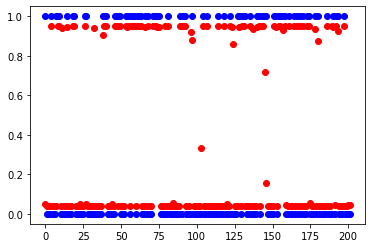

In [61]:
inv_norm_data = df_scalar.inverse_transform(norm_df)[list(test_index)]
plt.plot(
    inv_norm_data[:, Gender_male_pos_dst],
    #inv_norm_data[:, Gender_female_pos_dst],
    'bo')
plt.plot(
    inv_data[:, 0], 
    #inv_data[:, 1], 
    'ro')

Давайте мы возьмем некую выборку данных, те данные что ниже 0.2 мы будем считать как 0, а те что выше 0.8 за 1.
Из этого следует что среди более 1000 данных точность нашей сети отличное, те точки что находятся между 0.2 и 0.8 - это выбросы в нашем случае их не больше 10, это отличный результат

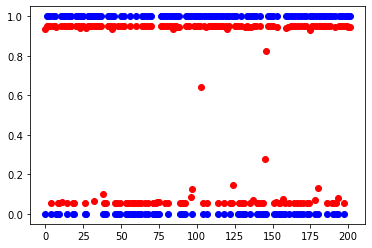

In [62]:
plt.plot(
    #inv_norm_data[:, Gender_male_pos_dst],
    inv_norm_data[:, Gender_female_pos_dst],
    'bo')
plt.plot(
    #inv_data[:, 0], 
    inv_data[:, 1], 
    'ro')

In [63]:
inv_data, inv_norm_data[:, [Gender_male_pos_dst, Gender_female_pos_dst]]

(array([[0.05094948, 0.9368273 ],
        [0.04122904, 0.94820106],
        [0.0400224 , 0.9496268 ],
        [0.04064494, 0.94889104],
        [0.94892812, 0.05613205],
        [0.04003891, 0.94960725],
        [0.04018563, 0.9494338 ],
        [0.04231119, 0.94692641],
        [0.94864249, 0.05642655],
        [0.94878417, 0.05628055],
        [0.04006895, 0.94957161],
        [0.94243979, 0.06279519],
        [0.04025269, 0.94935441],
        [0.0401656 , 0.94945747],
        [0.94787633, 0.05721602],
        [0.04002592, 0.94962263],
        [0.04010513, 0.94952893],
        [0.04007751, 0.9495616 ],
        [0.94860208, 0.05646813],
        [0.9489513 , 0.05610815],
        [0.04001594, 0.94963443],
        [0.04010117, 0.94953358],
        [0.04023379, 0.94937694],
        [0.04785997, 0.94042552],
        [0.04025176, 0.94935548],
        [0.04003912, 0.9496069 ],
        [0.94844103, 0.05663428],
        [0.04984176, 0.9381181 ],
        [0.04001632, 0.94963384],
        [0.040

**Регрессионный анализ** — метод моделирования измеряемых данных и исследования их свойств. Данные состоят из пар значений зависимой переменной (переменной отклика) и независимой переменной (объясняющей переменной). Регрессионная модель есть функция независимой переменной и параметров с добавленной случайной переменной. Параметры модели настраиваются таким образом, что модель наилучшим образом приближает данные.

Регрессионный анализ используется для прогноза, анализа временных рядов, тестирования гипотез и выявления скрытых взаимосвязей в данных.